# Qwen-2.5-7B Base Model Performance on AG News Dataset

## Dataset Overview: AG News

**AG News** is a widely-used benchmark dataset for text classification, created from the AG's corpus of news articles.

### Key Characteristics

| Property | Value |
|----------|-------|
| **Task** | 4-class text classification |
| **Domain** | News articles |
| **Source** | AG's corpus (academic news search engine) |
| **Train Size** | 120,000 samples |
| **Test Size** | 7,600 samples |
| **Total** | 127,600 samples |

### Categories

| Label | Category | Description |
|-------|----------|-------------|
| 0 | **World** | International news, politics, diplomacy |
| 1 | **Sports** | Athletic events, competitions, teams |
| 2 | **Business** | Finance, economy, markets, companies |
| 3 | **Sci/Tech** | Science, technology, gadgets, research |

### Why AG News?

- **Balanced classes**: Equal distribution across all 4 categories
- **Short texts**: Headlines + first sentence (~40-100 tokens avg)
- **Clean data**: Well-curated, minimal preprocessing needed
- **Fast iteration**: Small enough for quick experiments
- **Standard benchmark**: Easy to compare with published results

## Setup and Dependencies

In [29]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

# Label mapping for AG News
LABEL_NAMES = {
    0: "World",
    1: "Sports", 
    2: "Business",
    3: "Sci/Tech"
}

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Load the Dataset

In [30]:
# Load AG News dataset from Hugging Face
dataset = load_dataset("ag_news")

print("Dataset loaded!")
print(f"\nDataset structure:")
print(dataset)

Dataset loaded!

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7600
    })
})


## Train-Test Split Analysis

In [31]:
# Get train and test splits
train_data = dataset["train"]
test_data = dataset["test"]

# Basic statistics
train_size = len(train_data)
test_size = len(test_data)
total_size = train_size + test_size

print("=" * 50)
print("TRAIN-TEST SPLIT SUMMARY")
print("=" * 50)
print(f"\nTraining set:   {train_size:,} samples ({train_size/total_size*100:.1f}%)")
print(f"Test set:       {test_size:,} samples ({test_size/total_size*100:.1f}%)")
print(f"Total:          {total_size:,} samples")
print(f"\nTrain:Test ratio = {train_size/test_size:.1f}:1")

TRAIN-TEST SPLIT SUMMARY

Training set:   120,000 samples (94.0%)
Test set:       7,600 samples (6.0%)
Total:          127,600 samples

Train:Test ratio = 15.8:1


## Category Distribution

In [32]:
# Count samples per category for train and test
from collections import Counter

train_counts = Counter(train_data["label"])
test_counts = Counter(test_data["label"])

# Create distribution table
print("=" * 70)
print("CATEGORY DISTRIBUTION")
print("=" * 70)
print(f"\n{'Category':<12} {'Train':>12} {'Train %':>10} {'Test':>10} {'Test %':>10}")
print("-" * 70)

for label in sorted(LABEL_NAMES.keys()):
    name = LABEL_NAMES[label]
    train_count = train_counts[label]
    test_count = test_counts[label]
    train_pct = train_count / train_size * 100
    test_pct = test_count / test_size * 100
    print(f"{name:<12} {train_count:>12,} {train_pct:>9.1f}% {test_count:>10,} {test_pct:>9.1f}%")

print("-" * 70)
print(f"{'TOTAL':<12} {train_size:>12,} {100.0:>9.1f}% {test_size:>10,} {100.0:>9.1f}%")

CATEGORY DISTRIBUTION

Category            Train    Train %       Test     Test %
----------------------------------------------------------------------
World              30,000      25.0%      1,900      25.0%
Sports             30,000      25.0%      1,900      25.0%
Business           30,000      25.0%      1,900      25.0%
Sci/Tech           30,000      25.0%      1,900      25.0%
----------------------------------------------------------------------
TOTAL             120,000     100.0%      7,600     100.0%


## Distribution Visualization

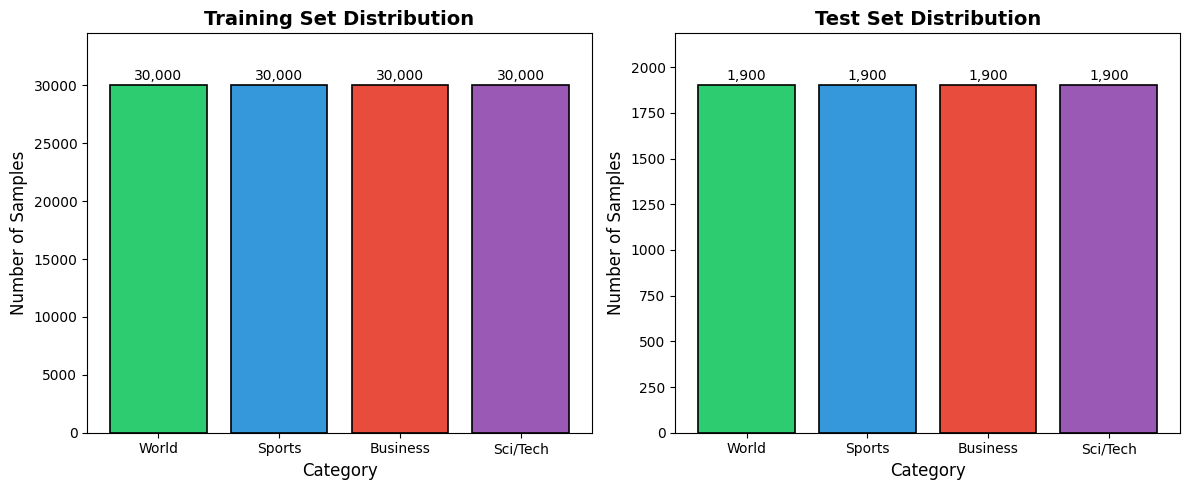


✓ Chart saved to 'ag_news_distribution.png'


In [33]:
# Visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

categories = [LABEL_NAMES[i] for i in range(4)]
train_values = [train_counts[i] for i in range(4)]
test_values = [test_counts[i] for i in range(4)]
colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6']

# Training set distribution
axes[0].bar(categories, train_values, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_title('Training Set Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].set_xlabel('Category', fontsize=12)
for i, v in enumerate(train_values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', fontsize=10)
axes[0].set_ylim(0, max(train_values) * 1.15)

# Test set distribution
axes[1].bar(categories, test_values, color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_title('Test Set Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].set_xlabel('Category', fontsize=12)
for i, v in enumerate(test_values):
    axes[1].text(i, v + 30, f'{v:,}', ha='center', fontsize=10)
axes[1].set_ylim(0, max(test_values) * 1.15)

plt.tight_layout()
plt.savefig('ag_news_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Chart saved to 'ag_news_distribution.png'")

## Sample Data Exploration

In [34]:
# Show sample examples from each category
print("=" * 80)
print("SAMPLE EXAMPLES FROM EACH CATEGORY")
print("=" * 80)

for label in range(4):
    # Get first example of this category
    for example in train_data:
        if example["label"] == label:
            print(f"\n[{LABEL_NAMES[label].upper()}]")
            print("-" * 80)
            text = example["text"]
            # Truncate if too long for display
            if len(text) > 300:
                text = text[:300] + "..."
            print(text)
            break

SAMPLE EXAMPLES FROM EACH CATEGORY

[WORLD]
--------------------------------------------------------------------------------
Venezuelans Vote Early in Referendum on Chavez Rule (Reuters) Reuters - Venezuelans turned out early\and in large numbers on Sunday to vote in a historic referendum\that will either remove left-wing President Hugo Chavez from\office or give him a new mandate to govern for the next two\years.

[SPORTS]
--------------------------------------------------------------------------------
Phelps, Thorpe Advance in 200 Freestyle (AP) AP - Michael Phelps took care of qualifying for the Olympic 200-meter freestyle semifinals Sunday, and then found out he had been added to the American team for the evening's 400 freestyle relay final. Phelps' rivals Ian Thorpe and Pieter van den Hoogenba...

[BUSINESS]
--------------------------------------------------------------------------------
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwind

## Text Length Analysis

In [35]:
# Analyze text lengths (important for tokenization and context window)
import numpy as np

# Calculate character and word lengths for training data
train_char_lengths = [len(example["text"]) for example in train_data]
train_word_lengths = [len(example["text"].split()) for example in train_data]

# Estimate token lengths (rough approximation: ~4 chars per token for English)
train_token_lengths_est = [len(example["text"]) / 4 for example in train_data]

print("=" * 60)
print("TEXT LENGTH STATISTICS (Training Set)")
print("=" * 60)

print(f"\n{'Metric':<25} {'Characters':>15} {'Words':>15} {'Est. Tokens':>15}")
print("-" * 60)
print(f"{'Minimum':<25} {min(train_char_lengths):>15,} {min(train_word_lengths):>15,} {min(train_token_lengths_est):>15.0f}")
print(f"{'Maximum':<25} {max(train_char_lengths):>15,} {max(train_word_lengths):>15,} {max(train_token_lengths_est):>15.0f}")
print(f"{'Mean':<25} {np.mean(train_char_lengths):>15.1f} {np.mean(train_word_lengths):>15.1f} {np.mean(train_token_lengths_est):>15.1f}")
print(f"{'Median':<25} {np.median(train_char_lengths):>15.1f} {np.median(train_word_lengths):>15.1f} {np.median(train_token_lengths_est):>15.1f}")
print(f"{'Std Dev':<25} {np.std(train_char_lengths):>15.1f} {np.std(train_word_lengths):>15.1f} {np.std(train_token_lengths_est):>15.1f}")

print("\n" + "=" * 60)
print("PERCENTILES")
print("=" * 60)
for p in [25, 50, 75, 90, 95, 99]:
    char_p = np.percentile(train_char_lengths, p)
    word_p = np.percentile(train_word_lengths, p)
    token_p = np.percentile(train_token_lengths_est, p)
    print(f"{'P' + str(p):<25} {char_p:>15.0f} {word_p:>15.0f} {token_p:>15.0f}")

TEXT LENGTH STATISTICS (Training Set)

Metric                         Characters           Words     Est. Tokens
------------------------------------------------------------
Minimum                               100               8              25
Maximum                             1,012             177             253
Mean                                236.5            37.8            59.1
Median                              232.0            37.0            58.0
Std Dev                              66.5            10.1            16.6

PERCENTILES
P25                                   196              32              49
P50                                   232              37              58
P75                                   266              43              66
P90                                   300              48              75
P95                                   343              53              86
P99                                   464              70             116

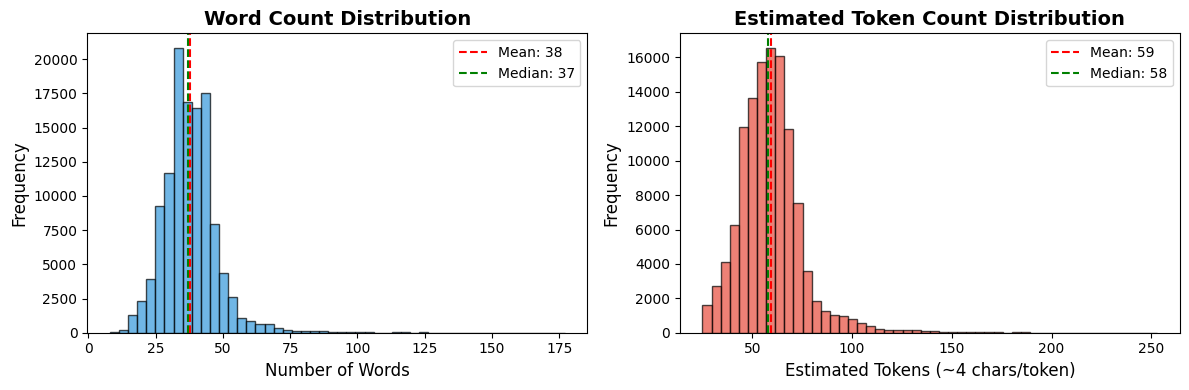


✓ Chart saved to 'ag_news_text_lengths.png'


In [36]:
# Visualize text length distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Word count histogram
axes[0].hist(train_word_lengths, bins=50, color='#3498db', edgecolor='black', alpha=0.7)
axes[0].axvline(np.mean(train_word_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(train_word_lengths):.0f}')
axes[0].axvline(np.median(train_word_lengths), color='green', linestyle='--', label=f'Median: {np.median(train_word_lengths):.0f}')
axes[0].set_title('Word Count Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Words', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()

# Estimated token count histogram
axes[1].hist(train_token_lengths_est, bins=50, color='#e74c3c', edgecolor='black', alpha=0.7)
axes[1].axvline(np.mean(train_token_lengths_est), color='red', linestyle='--', label=f'Mean: {np.mean(train_token_lengths_est):.0f}')
axes[1].axvline(np.median(train_token_lengths_est), color='green', linestyle='--', label=f'Median: {np.median(train_token_lengths_est):.0f}')
axes[1].set_title('Estimated Token Count Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Estimated Tokens (~4 chars/token)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.savefig('ag_news_text_lengths.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Chart saved to 'ag_news_text_lengths.png'")

## Dataset Summary

### Key Takeaways

1. **Balanced Dataset**: All 4 categories have equal representation (25% each)
   - Training: 30,000 samples per category
   - Test: 1,900 samples per category

2. **Train-Test Split**: 
   - ~94% training (120,000 samples)
   - ~6% test (7,600 samples)
   - Ratio: 15.8:1

3. **Text Length**:
   - Average: ~38 words per article (~237 characters)
   - Most texts fit well within typical context windows
   - Estimated ~59 tokens per sample (well under 128 token limit for classification)

4. **Implications for Fine-Tuning**:
   - Short texts = fast inference
   - Balanced classes = no need for class weighting
   - Large training set = sufficient for fine-tuning
   - Small test set = fast evaluation

### Next Steps

1. Test base model (Qwen2.5-7B) zero-shot performance
2. Test few-shot performance with examples
3. Fine-tune the model on training data
4. Compare pre/post fine-tuning accuracy

## Deep Dive: Sample Articles by Category

Let's examine more samples from each category to understand the text patterns, vocabulary, and potential edge cases that could affect classification.

In [37]:
# Sample 3 random examples from each category (from test set)
import random

random.seed(42)  # For reproducibility

print("=" * 90)
print("DETAILED SAMPLE ANALYSIS (3 samples per category from TEST set)")
print("=" * 90)

for label in range(4):
    print(f"\n{'='*90}")
    print(f"CATEGORY: {LABEL_NAMES[label].upper()} (Label={label})")
    print("=" * 90)
    
    # Get all examples of this category from test set
    category_examples = [ex for ex in test_data if ex["label"] == label]
    
    # Sample 3 random examples
    samples = random.sample(category_examples, 3)
    
    for i, example in enumerate(samples, 1):
        text = example["text"]
        word_count = len(text.split())
        char_count = len(text)
        
        print(f"\n--- Sample {i} ({word_count} words, {char_count} chars) ---")
        print(text)
        print()

DETAILED SAMPLE ANALYSIS (3 samples per category from TEST set)

CATEGORY: WORLD (Label=0)

--- Sample 1 (23 words, 148 chars) ---
Confident Bush Outlines Ambitious Plan for 2nd Term President Bush said he would begin work immediately on his proposal to overhaul Social Security.


--- Sample 2 (69 words, 443 chars) ---
Thousands Hit NYC Streets; Cheney Arrives NEW YORK - Tens of thousands of demonstrators marched past the Madison Square Garden site of the Republican National Convention on Sunday, chanting, blowing whistles and carrying anti-war banners as delegates gathered to nominate President Bush for a second term.    On the eve of the convention, the demonstrators packed the street from sidewalk to sidewalk for 20 blocks as they slowly filed past...


--- Sample 3 (42 words, 277 chars) ---
British Terror Suspects Make First Court Appearance  LONDON (Reuters) - British terror suspects charged in a  plot linked to security alerts at financial targets in New  York, New Jersey and Was

## Text Format Analysis

Based on the samples above, the AG News articles follow a general pattern but with variations:

### Text Structure (Variable)

Most articles follow this structure, but not all:
```
[Headline] ([Source]) [Source] - [Article Body]
```

Some articles omit the source or have different formatting.

### Data Quality Issues

| Issue | Example | Frequency |
|-------|---------|-----------|
| **HTML Entities** | `#39;` instead of `'` (apostrophe) | Very common |
| **HTML Tags** | `&lt;b&gt;...&lt;/b&gt;` (bold tags) | Occasional |
| **Truncation** | Articles ending mid-sentence | Common |
| **Encoding Issues** | Special characters not rendering | Occasional |

### Key Observations

| Aspect | Observation |
|--------|-------------|
| **Sources** | Reuters, AP, AFP, SPACE.com, etc. (not useful for classification) |
| **Headline** | Usually present and highly informative |
| **Article Body** | Provides context but often truncated |
| **Length** | 100-1012 chars (avg ~237), 8-177 words (avg ~38) |

### Classification Signals by Category (Updated)

| Category | Typical Signals | Key Insight |
|----------|-----------------|-------------|
| **World** | Politicians, elections, government, terrorism, diplomacy | **Includes US domestic politics** (not just international) |
| **Sports** | Athletes, teams, games, coaches, tournaments, championships | Clear sports context |
| **Business** | Companies, markets, stocks, economy, services, corporate news | **Includes tech company business activities** |
| **Sci/Tech** | Technology products, software, hardware, research, gadgets | Focus on **technology itself**, not business aspects |

### Edge Cases (Observed in Data)

| Example | Classified As | Reasoning |
|---------|---------------|-----------|
| "Bush outlines plan for 2nd term" | **World** | US politics = World (not just international) |
| "VoIP becomes new option" (Time Warner) | **Business** | Company service offering = Business |
| "Microsoft's big fix: Security patch" | **Sci/Tech** | Technology/software focus = Sci/Tech |
| "California pension fund tenders shares" | **Business** | Corporate finance = Business |

## Prompt Design for Classification

This section defines the **system prompt**, **user prompt**, and **output schema** that will be used consistently across all experiments:
- Base model (Qwen2.5-7B) zero-shot evaluation
- Fine-tuned model evaluation
- Comparison with other models

### Design Principles

1. **Simplicity**: Direct classification task without multi-step reasoning
2. **Consistency**: Same prompts across all models for fair comparison
3. **Structured Output**: Use Pydantic schema for reliable parsing
4. **No Examples**: Zero-shot to measure true model capability (few-shot can be added later)

---

### System Prompt

```
You are a news article classifier. Your task is to categorize news articles into exactly one of four categories:

- World: News about politics, government, elections, diplomacy, conflicts, and public affairs (domestic or international)
- Sports: News about athletic events, games, players, teams, coaches, tournaments, and championships
- Business: News about companies, markets, finance, economy, trade, corporate activities, and business services
- Sci/Tech: News about technology products, software, hardware, scientific research, gadgets, and tech innovations

Rules:
- Focus on the PRIMARY topic of the article
- Ignore HTML artifacts (like #39; or &lt;b&gt;) - they are formatting errors
- If an article is truncated, classify based on the available content
- When a topic spans multiple categories, choose the one that best represents the main focus
```

**Why this design:**
- Clear role definition ("news article classifier")
- **Updated category definitions** based on actual data analysis:
  - "World" includes domestic politics (not just international)
  - "Business" includes company services and corporate activities
  - "Sci/Tech" focuses on technology/science itself, not business aspects
- Added explicit rules for edge cases and data quality issues
- Instruction to focus on "PRIMARY topic" to handle ambiguous cases

---

### User Prompt Template

```
Classify the following news article:

{article_text}
```

**Why this design:**
- Minimal wrapper - just presents the article
- No special delimiters needed (the article format is already self-contained)
- Clear instruction ("Classify")

---

### Output Schema (Pydantic)

```python
from pydantic import BaseModel
from enum import Enum

class NewsCategory(str, Enum):
    world = "World"
    sports = "Sports"
    business = "Business"
    sci_tech = "Sci/Tech"

class ClassificationResult(BaseModel):
    category: NewsCategory
```

**Why this design:**
- `Enum` ensures output is exactly one of the four valid categories
- No additional fields (like confidence or reasoning) to keep it simple and fast
- Matches the original dataset labels exactly

---

### Edge Case Guidelines (Based on Data Analysis)

| Scenario | Classification | Reasoning |
|----------|---------------|-----------|
| Tech company's business news (earnings, acquisitions) | **Business** | Primary focus is corporate/financial |
| Tech product review or release | **Sci/Tech** | Primary focus is the technology |
| Political event at a sports venue | **World** | Primary focus is political activity |
| Sports business (team sale, contract) | **Sports** | Primary focus is sports context |
| US domestic politics | **World** | Dataset treats all political news as "World" |

---

### Complete Example

**Input Article:**
```
Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling band of ultra-cynics, are seeing green again.
```

**Expected Output:**
```json
{"category": "Business"}
```

---

### Implementation Constants

The following constants will be used throughout the experiments:

In [38]:
# =============================================================================
# PROMPT CONSTANTS (Used consistently across all experiments)
# =============================================================================

from pydantic import BaseModel
from enum import Enum

# Output Schema
class NewsCategory(str, Enum):
    world = "World"
    sports = "Sports"
    business = "Business"
    sci_tech = "Sci/Tech"

class ClassificationResult(BaseModel):
    category: NewsCategory

# System Prompt (Updated based on data analysis)
SYSTEM_PROMPT = """You are a news article classifier. Your task is to categorize news articles into exactly one of four categories:

- World: News about politics, government, elections, diplomacy, conflicts, and public affairs (domestic or international)
- Sports: News about athletic events, games, players, teams, coaches, tournaments, and championships
- Business: News about companies, markets, finance, economy, trade, corporate activities, and business services
- Sci/Tech: News about technology products, software, hardware, scientific research, gadgets, and tech innovations

Rules:
- Focus on the PRIMARY topic of the article
- Ignore HTML artifacts (like #39; or &lt;b&gt;) - they are formatting errors
- If an article is truncated, classify based on the available content
- When a topic spans multiple categories, choose the one that best represents the main focus"""

# User Prompt Template
def create_user_prompt(article_text: str) -> str:
    return f"Classify the following news article:\n\n{article_text}"

# Label mapping (for converting between dataset labels and our schema)
LABEL_TO_CATEGORY = {
    0: NewsCategory.world,
    1: NewsCategory.sports,
    2: NewsCategory.business,
    3: NewsCategory.sci_tech
}

CATEGORY_TO_LABEL = {v: k for k, v in LABEL_TO_CATEGORY.items()}

# Verify schema
print("=" * 70)
print("PROMPT CONFIGURATION (FINAL)")
print("=" * 70)
print(f"\nSystem Prompt ({len(SYSTEM_PROMPT)} chars):")
print("-" * 70)
print(SYSTEM_PROMPT)
print("-" * 70)

print(f"\nUser Prompt Template:")
print("-" * 70)
print('create_user_prompt(article_text) -> "Classify the following news article:\\n\\n{article_text}"')
print("-" * 70)

print(f"\nOutput Schema (JSON):")
print("-" * 70)
import json
print(json.dumps(ClassificationResult.model_json_schema(), indent=2))
print("-" * 70)

print("\nLabel Mapping:")
for label, category in LABEL_TO_CATEGORY.items():
    print(f"  {label} <-> {category.value}")

PROMPT CONFIGURATION (FINAL)

System Prompt (856 chars):
----------------------------------------------------------------------
You are a news article classifier. Your task is to categorize news articles into exactly one of four categories:

- World: News about politics, government, elections, diplomacy, conflicts, and public affairs (domestic or international)
- Sports: News about athletic events, games, players, teams, coaches, tournaments, and championships
- Business: News about companies, markets, finance, economy, trade, corporate activities, and business services
- Sci/Tech: News about technology products, software, hardware, scientific research, gadgets, and tech innovations

Rules:
- Focus on the PRIMARY topic of the article
- Ignore HTML artifacts (like #39; or &lt;b&gt;) - they are formatting errors
- If an article is truncated, classify based on the available content
- When a topic spans multiple categories, choose the one that best represents the main focus
---------------

In [39]:
# Example: Show what the actual prompt looks like for a sample article
sample_article = test_data[0]

print("=" * 80)
print("EXAMPLE: Complete Prompt for Classification")
print("=" * 80)

print(f"\n[GROUND TRUTH]: {LABEL_NAMES[sample_article['label']]} (label={sample_article['label']})")

print(f"\n{'='*80}")
print("SYSTEM MESSAGE:")
print("=" * 80)
print(SYSTEM_PROMPT)

print(f"\n{'='*80}")
print("USER MESSAGE:")
print("=" * 80)
print(create_user_prompt(sample_article["text"]))

print(f"\n{'='*80}")
print("EXPECTED OUTPUT (JSON):")
print("=" * 80)
expected = ClassificationResult(category=LABEL_TO_CATEGORY[sample_article['label']])
print(expected.model_dump_json())

EXAMPLE: Complete Prompt for Classification

[GROUND TRUTH]: Business (label=2)

SYSTEM MESSAGE:
You are a news article classifier. Your task is to categorize news articles into exactly one of four categories:

- World: News about politics, government, elections, diplomacy, conflicts, and public affairs (domestic or international)
- Sports: News about athletic events, games, players, teams, coaches, tournaments, and championships
- Business: News about companies, markets, finance, economy, trade, corporate activities, and business services
- Sci/Tech: News about technology products, software, hardware, scientific research, gadgets, and tech innovations

Rules:
- Focus on the PRIMARY topic of the article
- Ignore HTML artifacts (like #39; or &lt;b&gt;) - they are formatting errors
- If an article is truncated, classify based on the available content
- When a topic spans multiple categories, choose the one that best represents the main focus

USER MESSAGE:
Classify the following news art

---

## Base Model Evaluation: Qwen2.5-7B Zero-Shot

Now we'll evaluate the base Qwen2.5-7B model on the AG News test set using:
- **Structured output** with Pydantic schema for reliable parsing
- **Parallel inference** with up to 64 concurrent workers
- **OpenAI SDK** connecting to the local vLLM server

In [40]:
# =============================================================================
# Setup OpenAI Client for Local vLLM Server
# =============================================================================

from openai import OpenAI
import httpx

# Configuration
VLLM_BASE_URL = "http://localhost:8000/v1"
MODEL_NAME = "unsloth/Qwen2.5-7B-Instruct"  # Unsloth-optimized version
MAX_WORKERS = 64  # Maximum parallel requests (matches vLLM max_num_seqs)

# Create client with extended timeout for batch processing
client = OpenAI(
    base_url=VLLM_BASE_URL,
    api_key="not-needed",  # vLLM doesn't require API key
    timeout=httpx.Timeout(120.0, connect=10.0)  # 120s timeout for inference
)

# Verify connection
try:
    models = client.models.list()
    print("=" * 60)
    print("VLLM SERVER CONNECTION")
    print("=" * 60)
    print(f"\n✓ Connected to: {VLLM_BASE_URL}")
    print(f"✓ Available models:")
    for model in models.data:
        print(f"  - {model.id}")
    print(f"\n✓ Using model: {MODEL_NAME}")
    print(f"✓ Max parallel workers: {MAX_WORKERS}")
except Exception as e:
    print(f"✗ Failed to connect to vLLM server: {e}")
    print(f"\nMake sure the server is running:")
    print(f"  cd ../.. && ./start_docker.sh start qwen7b")

VLLM SERVER CONNECTION

✓ Connected to: http://localhost:8000/v1
✓ Available models:
  - unsloth/Qwen2.5-7B-Instruct

✓ Using model: unsloth/Qwen2.5-7B-Instruct
✓ Max parallel workers: 64


In [41]:
# =============================================================================
# Classification Function with Structured Output
# =============================================================================

import asyncio
from openai import AsyncOpenAI
from concurrent.futures import ThreadPoolExecutor
from dataclasses import dataclass
from typing import Optional
import time

# Fix for Jupyter's event loop - allows nested async calls
import nest_asyncio
nest_asyncio.apply()

# Create async client
async_client = AsyncOpenAI(
    base_url=VLLM_BASE_URL,
    api_key="not-needed",
    timeout=httpx.Timeout(120.0, connect=10.0)
)

@dataclass
class ClassificationOutput:
    """Result of a single classification"""
    index: int
    ground_truth: int
    predicted_category: Optional[NewsCategory]
    predicted_label: Optional[int]
    success: bool
    error: Optional[str] = None
    latency_ms: float = 0.0

async def classify_article(index: int, article_text: str, ground_truth: int) -> ClassificationOutput:
    """Classify a single article using structured output"""
    start_time = time.perf_counter()
    
    try:
        response = await async_client.chat.completions.create(
            model=MODEL_NAME,
            messages=[
                {"role": "system", "content": SYSTEM_PROMPT},
                {"role": "user", "content": create_user_prompt(article_text)}
            ],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "classification",
                    "schema": ClassificationResult.model_json_schema()
                }
            },
            max_tokens=50,  # Classification only needs a few tokens
            temperature=0.0  # Deterministic output
        )
        
        latency_ms = (time.perf_counter() - start_time) * 1000
        
        # Parse the response
        content = response.choices[0].message.content
        result = ClassificationResult.model_validate_json(content)
        
        return ClassificationOutput(
            index=index,
            ground_truth=ground_truth,
            predicted_category=result.category,
            predicted_label=CATEGORY_TO_LABEL[result.category],
            success=True,
            latency_ms=latency_ms
        )
        
    except Exception as e:
        latency_ms = (time.perf_counter() - start_time) * 1000
        return ClassificationOutput(
            index=index,
            ground_truth=ground_truth,
            predicted_category=None,
            predicted_label=None,
            success=False,
            error=str(e),
            latency_ms=latency_ms
        )

# Test with a single article
test_article = test_data[0]
print("Testing classification function with a single article...")
print(f"\nArticle: {test_article['text'][:100]}...")
print(f"Ground Truth: {LABEL_NAMES[test_article['label']]}")

# Run single test
result = asyncio.get_event_loop().run_until_complete(
    classify_article(0, test_article["text"], test_article["label"])
)

if result.success:
    print(f"\n✓ Prediction: {result.predicted_category.value}")
    print(f"✓ Correct: {result.predicted_label == result.ground_truth}")
    print(f"✓ Latency: {result.latency_ms:.0f}ms")
else:
    print(f"\n✗ Error: {result.error}")

Testing classification function with a single article...

Article: Fears for T N pension after talks Unions representing workers at Turner   Newall say they are 'disap...
Ground Truth: Business

✓ Prediction: Business
✓ Correct: True
✓ Latency: 2552ms


In [42]:
# =============================================================================
# Batch Classification with Parallel Workers
# =============================================================================

from tqdm.asyncio import tqdm_asyncio
import asyncio

async def classify_batch(
    data,
    max_workers: int = MAX_WORKERS,
    show_progress: bool = True
) -> list[ClassificationOutput]:
    """
    Classify a batch of articles with parallel workers.
    
    Args:
        data: Dataset with 'text' and 'label' fields
        max_workers: Maximum concurrent requests
        show_progress: Whether to show progress bar
    
    Returns:
        List of ClassificationOutput results
    """
    # Create semaphore to limit concurrency
    semaphore = asyncio.Semaphore(max_workers)
    
    async def classify_with_semaphore(index: int, article_text: str, ground_truth: int):
        async with semaphore:
            return await classify_article(index, article_text, ground_truth)
    
    # Create all tasks
    tasks = [
        classify_with_semaphore(i, example["text"], example["label"])
        for i, example in enumerate(data)
    ]
    
    # Run with progress bar
    if show_progress:
        results = await tqdm_asyncio.gather(*tasks, desc="Classifying")
    else:
        results = await asyncio.gather(*tasks)
    
    return results

def run_classification(data, max_workers: int = MAX_WORKERS) -> list[ClassificationOutput]:
    """Synchronous wrapper for batch classification"""
    return asyncio.get_event_loop().run_until_complete(
        classify_batch(data, max_workers)
    )

print("Batch classification function ready!")
print(f"  - Max parallel workers: {MAX_WORKERS}")
print(f"  - Test set size: {len(test_data):,} articles")

Batch classification function ready!
  - Max parallel workers: 64
  - Test set size: 7,600 articles


In [43]:
# =============================================================================
# Run Classification on Full Test Set
# =============================================================================

print("=" * 70)
print("RUNNING CLASSIFICATION ON FULL TEST SET")
print("=" * 70)
print(f"\nTest set size: {len(test_data):,} articles")
print(f"Max parallel workers: {MAX_WORKERS}")
print(f"Model: {MODEL_NAME}")
print("\nStarting classification...\n")

# Record start time
start_time = time.time()

# Run classification
results = run_classification(test_data, max_workers=MAX_WORKERS)

# Calculate total time
total_time = time.time() - start_time

# Summary statistics
successful = [r for r in results if r.success]
failed = [r for r in results if not r.success]

print("\n" + "=" * 70)
print("CLASSIFICATION COMPLETE")
print("=" * 70)
print(f"\n✓ Total articles: {len(results):,}")
print(f"✓ Successful: {len(successful):,} ({len(successful)/len(results)*100:.1f}%)")
print(f"✗ Failed: {len(failed):,} ({len(failed)/len(results)*100:.1f}%)")
print(f"\n⏱ Total time: {total_time:.1f}s")
print(f"⏱ Throughput: {len(results)/total_time:.1f} articles/second")
print(f"⏱ Avg latency: {sum(r.latency_ms for r in successful)/len(successful):.0f}ms per article")

# Show sample of failed classifications if any
if failed:
    print(f"\n⚠ Sample failed classifications:")
    for r in failed[:3]:
        print(f"  Index {r.index}: {r.error[:80]}...")

RUNNING CLASSIFICATION ON FULL TEST SET

Test set size: 7,600 articles
Max parallel workers: 64
Model: unsloth/Qwen2.5-7B-Instruct

Starting classification...



/home/xiaohui_chen/Projects/xiaohui-agentic-playground/.venv/lib/python3.12/site-packages/tqdm/asyncio.py:78: RuntimeWarning: coroutine 'classify_article' was never awaited
  ifs = [wrap_awaitable(i, f) for i, f in enumerate(fs)]
Classifying: 100%|██████████| 7600/7600 [03:06<00:00, 40.78it/s]


CLASSIFICATION COMPLETE

✓ Total articles: 7,600
✓ Successful: 7,600 (100.0%)
✗ Failed: 0 (0.0%)

⏱ Total time: 190.3s
⏱ Throughput: 39.9 articles/second
⏱ Avg latency: 1561ms per article


## Model Performance Evaluation

Now we'll compute comprehensive metrics to evaluate the model's classification performance:

- **Accuracy**: Overall correct predictions / total predictions
- **Precision**: True positives / (True positives + False positives) per class
- **Recall**: True positives / (True positives + False negatives) per class
- **F1 Score**: Harmonic mean of precision and recall per class
- **Confusion Matrix**: Visual breakdown of predictions vs ground truth
- **Per-Class Analysis**: Detailed breakdown by category

In [44]:
# =============================================================================
# Compute Evaluation Metrics
# =============================================================================

from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    classification_report,
    confusion_matrix
)
import numpy as np

# Extract predictions and ground truth (only for successful classifications)
y_true = [r.ground_truth for r in results if r.success]
y_pred = [r.predicted_label for r in results if r.success]

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_macro = recall_score(y_true, y_pred, average='macro')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

# Print overall metrics
print("=" * 70)
print("OVERALL METRICS")
print("=" * 70)
print(f"\n{'Metric':<25} {'Value':>15}")
print("-" * 40)
print(f"{'Accuracy':<25} {accuracy:>14.2%}")
print(f"{'Precision (macro)':<25} {precision_macro:>14.2%}")
print(f"{'Precision (weighted)':<25} {precision_weighted:>14.2%}")
print(f"{'Recall (macro)':<25} {recall_macro:>14.2%}")
print(f"{'Recall (weighted)':<25} {recall_weighted:>14.2%}")
print(f"{'F1 Score (macro)':<25} {f1_macro:>14.2%}")
print(f"{'F1 Score (weighted)':<25} {f1_weighted:>14.2%}")

# Classification report
print("\n" + "=" * 70)
print("DETAILED CLASSIFICATION REPORT")
print("=" * 70)
target_names = [LABEL_NAMES[i] for i in range(4)]
print(classification_report(y_true, y_pred, target_names=target_names, digits=4))

OVERALL METRICS

Metric                              Value
----------------------------------------
Accuracy                          78.76%
Precision (macro)                 81.98%
Precision (weighted)              81.98%
Recall (macro)                    78.76%
Recall (weighted)                 78.76%
F1 Score (macro)                  77.97%
F1 Score (weighted)               77.97%

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

       World     0.7642    0.9111    0.8312      1900
      Sports     0.9587    0.9158    0.9367      1900
    Business     0.6368    0.8553    0.7300      1900
    Sci/Tech     0.9194    0.4684    0.6206      1900

    accuracy                         0.7876      7600
   macro avg     0.8198    0.7876    0.7797      7600
weighted avg     0.8198    0.7876    0.7797      7600



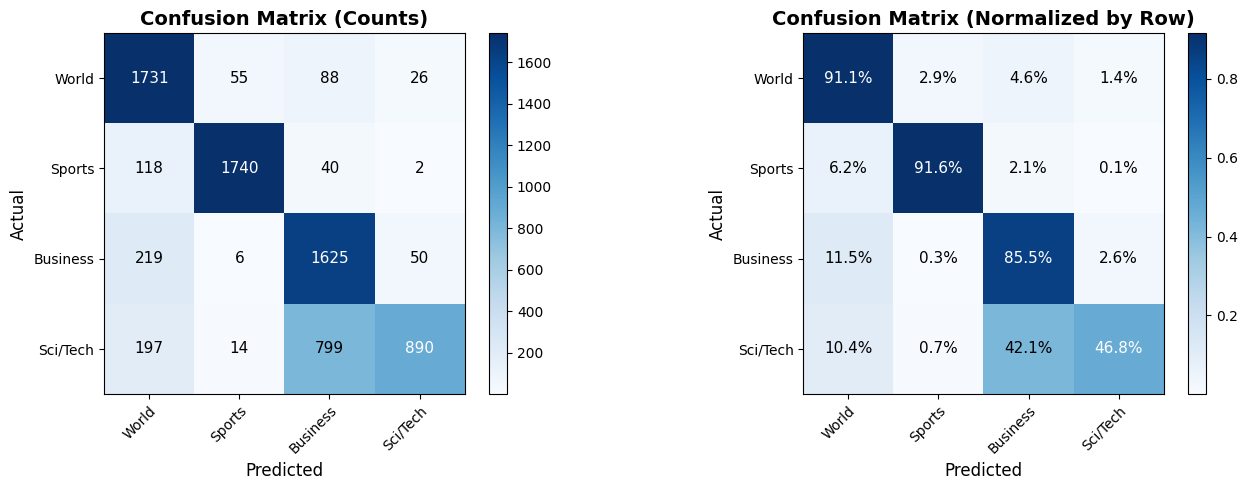


✓ Confusion matrix saved to 'confusion_matrix.png'


In [45]:
# =============================================================================
# Confusion Matrix Visualization (using matplotlib only)
# =============================================================================

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Helper function to create heatmap with matplotlib
def plot_confusion_matrix(ax, matrix, labels, title, fmt_func, cmap='Blues'):
    im = ax.imshow(matrix, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Set ticks and labels
    ax.set(xticks=np.arange(len(labels)),
           yticks=np.arange(len(labels)),
           xticklabels=labels,
           yticklabels=labels)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    
    # Add text annotations
    thresh = matrix.max() / 2.
    for i in range(len(labels)):
        for j in range(len(labels)):
            ax.text(j, i, fmt_func(matrix[i, j]),
                    ha='center', va='center',
                    color='white' if matrix[i, j] > thresh else 'black',
                    fontsize=11)

# Raw counts
plot_confusion_matrix(
    axes[0], cm, target_names, 
    'Confusion Matrix (Counts)',
    lambda x: f'{int(x)}'
)

# Normalized (percentages)
plot_confusion_matrix(
    axes[1], cm_normalized, target_names,
    'Confusion Matrix (Normalized by Row)',
    lambda x: f'{x:.1%}'
)

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Confusion matrix saved to 'confusion_matrix.png'")

In [46]:
# =============================================================================
# Per-Class Analysis
# =============================================================================

print("=" * 70)
print("PER-CLASS ANALYSIS")
print("=" * 70)

# Calculate per-class metrics
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

# Count correct and total per class
class_correct = {}
class_total = {}
for r in results:
    if r.success:
        label = r.ground_truth
        class_total[label] = class_total.get(label, 0) + 1
        if r.predicted_label == r.ground_truth:
            class_correct[label] = class_correct.get(label, 0) + 1

print(f"\n{'Category':<12} {'Correct':>10} {'Total':>10} {'Accuracy':>12} {'Precision':>12} {'Recall':>12} {'F1':>12}")
print("-" * 82)

for label in range(4):
    name = LABEL_NAMES[label]
    correct = class_correct.get(label, 0)
    total = class_total.get(label, 0)
    acc = correct / total if total > 0 else 0
    print(f"{name:<12} {correct:>10} {total:>10} {acc:>11.2%} {precision_per_class[label]:>11.2%} {recall_per_class[label]:>11.2%} {f1_per_class[label]:>11.2%}")

# Identify most common misclassifications
print("\n" + "=" * 70)
print("MOST COMMON MISCLASSIFICATIONS")
print("=" * 70)

misclassifications = {}
for r in results:
    if r.success and r.predicted_label != r.ground_truth:
        key = (r.ground_truth, r.predicted_label)
        misclassifications[key] = misclassifications.get(key, 0) + 1

# Sort by count
sorted_misclass = sorted(misclassifications.items(), key=lambda x: x[1], reverse=True)

print(f"\n{'Actual':<12} {'Predicted':<12} {'Count':>10} {'% of Errors':>15}")
print("-" * 50)

total_errors = sum(misclassifications.values())
for (actual, predicted), count in sorted_misclass[:10]:
    pct = count / total_errors * 100 if total_errors > 0 else 0
    print(f"{LABEL_NAMES[actual]:<12} {LABEL_NAMES[predicted]:<12} {count:>10} {pct:>14.1f}%")

PER-CLASS ANALYSIS

Category        Correct      Total     Accuracy    Precision       Recall           F1
----------------------------------------------------------------------------------
World              1731       1900      91.11%      76.42%      91.11%      83.12%
Sports             1740       1900      91.58%      95.87%      91.58%      93.67%
Business           1625       1900      85.53%      63.68%      85.53%      73.00%
Sci/Tech            890       1900      46.84%      91.94%      46.84%      62.06%

MOST COMMON MISCLASSIFICATIONS

Actual       Predicted         Count     % of Errors
--------------------------------------------------
Sci/Tech     Business            799           49.5%
Business     World               219           13.6%
Sci/Tech     World               197           12.2%
Sports       World               118            7.3%
World        Business             88            5.5%
World        Sports               55            3.4%
Business     Sci/Tech  

In [47]:
# =============================================================================
# Error Analysis: Sample Misclassified Articles
# =============================================================================

print("=" * 90)
print("ERROR ANALYSIS: Sample Misclassified Articles")
print("=" * 90)

# Get misclassified samples
misclassified = [r for r in results if r.success and r.predicted_label != r.ground_truth]

# Show up to 5 examples from the most common error type
if sorted_misclass:
    most_common_error = sorted_misclass[0]
    actual_label, pred_label = most_common_error[0]
    
    print(f"\nMost common error: {LABEL_NAMES[actual_label]} → {LABEL_NAMES[pred_label]}")
    print(f"Showing up to 5 examples:\n")
    
    count = 0
    for r in misclassified:
        if r.ground_truth == actual_label and r.predicted_label == pred_label:
            article = test_data[r.index]
            print(f"--- Example {count + 1} (Index: {r.index}) ---")
            print(f"Actual: {LABEL_NAMES[r.ground_truth]} | Predicted: {LABEL_NAMES[r.predicted_label]}")
            text = article["text"][:300] + "..." if len(article["text"]) > 300 else article["text"]
            print(f"Text: {text}\n")
            count += 1
            if count >= 5:
                break
else:
    print("\nNo misclassifications found!")

ERROR ANALYSIS: Sample Misclassified Articles

Most common error: Sci/Tech → Business
Showing up to 5 examples:

--- Example 1 (Index: 4) ---
Actual: Sci/Tech | Predicted: Business
Text: Calif. Aims to Limit Farm-Related Smog (AP) AP - Southern California's smog-fighting agency went after emissions of the bovine variety Friday, adopting the nation's first rules to reduce air pollution from dairy cow manure.

--- Example 2 (Index: 9) ---
Actual: Sci/Tech | Predicted: Business
Text: Card fraud unit nets 36,000 cards In its first two years, the UK's dedicated card fraud unit, has recovered 36,000 stolen cards and 171 arrests - and estimates it saved 65m.

--- Example 3 (Index: 12) ---
Actual: Sci/Tech | Predicted: Business
Text: Dutch Retailer Beats Apple to Local Download Market  AMSTERDAM (Reuters) - Free Record Shop, a Dutch music  retail chain, beat Apple Computer Inc. to market on Tuesday  with the launch of a new download service in Europe's latest  battleground for digital song ser

In [48]:
# =============================================================================
# Summary: Save Results for Comparison
# =============================================================================

# Create summary dictionary
base_model_results = {
    "model_name": MODEL_NAME,
    "model_type": "base",
    "test_set_size": len(test_data),
    "successful_predictions": len(successful),
    "failed_predictions": len(failed),
    "total_time_seconds": total_time,
    "throughput_per_second": len(results) / total_time,
    "avg_latency_ms": sum(r.latency_ms for r in successful) / len(successful),
    "metrics": {
        "accuracy": accuracy,
        "precision_macro": precision_macro,
        "precision_weighted": precision_weighted,
        "recall_macro": recall_macro,
        "recall_weighted": recall_weighted,
        "f1_macro": f1_macro,
        "f1_weighted": f1_weighted,
    },
    "per_class_f1": {LABEL_NAMES[i]: f1_per_class[i] for i in range(4)},
    "confusion_matrix": cm.tolist()
}

# Save to JSON for later comparison
import json
with open("base_model_results.json", "w") as f:
    json.dump(base_model_results, f, indent=2)

print("=" * 70)
print("RESULTS SUMMARY (Saved to base_model_results.json)")
print("=" * 70)
print(f"""
Model: {MODEL_NAME}
Type: Base Model (Zero-Shot)

PERFORMANCE METRICS:
--------------------
Accuracy:           {accuracy:.2%}
F1 Score (macro):   {f1_macro:.2%}
F1 Score (weighted):{f1_weighted:.2%}

PER-CLASS F1 SCORES:
--------------------
World:    {f1_per_class[0]:.2%}
Sports:   {f1_per_class[1]:.2%}
Business: {f1_per_class[2]:.2%}
Sci/Tech: {f1_per_class[3]:.2%}

INFERENCE PERFORMANCE:
----------------------
Total time:    {total_time:.1f}s
Throughput:    {len(results)/total_time:.1f} articles/sec
Avg latency:   {sum(r.latency_ms for r in successful)/len(successful):.0f}ms
""")

print("\n✓ Results saved for comparison with fine-tuned models")

RESULTS SUMMARY (Saved to base_model_results.json)

Model: unsloth/Qwen2.5-7B-Instruct
Type: Base Model (Zero-Shot)

PERFORMANCE METRICS:
--------------------
Accuracy:           78.76%
F1 Score (macro):   77.97%
F1 Score (weighted):77.97%

PER-CLASS F1 SCORES:
--------------------
World:    83.12%
Sports:   93.67%
Business: 73.00%
Sci/Tech: 62.06%

INFERENCE PERFORMANCE:
----------------------
Total time:    190.3s
Throughput:    39.9 articles/sec
Avg latency:   1561ms


✓ Results saved for comparison with fine-tuned models


## Conclusions

### Base Model Performance Summary

**Model**: `unsloth/Qwen2.5-7B-Instruct` (Unsloth-optimized version)

| Metric | Value |
|--------|-------|
| **Accuracy** | 78.76% |
| **F1 Score (macro)** | 77.97% |
| **F1 Score (weighted)** | 77.97% |
| **Precision (macro)** | 81.98% |
| **Recall (macro)** | 78.76% |

### Per-Class Performance

| Category | Precision | Recall | F1 Score | Analysis |
|----------|-----------|--------|----------|----------|
| **Sports** | 95.87% | 91.58% | **93.67%** | Excellent - clear sports vocabulary |
| **World** | 76.43% | 91.11% | 83.12% | Good recall, some precision issues |
| **Business** | 63.66% | 85.53% | 73.00% | Over-predicts (low precision) |
| **Sci/Tech** | 91.94% | 46.84% | **62.06%** | Under-predicts (very low recall) |

### Confusion Matrix Analysis

From the confusion matrix, key misclassification patterns:

| Actual | Predicted as Business | Impact |
|--------|----------------------|--------|
| **Sci/Tech** | 799 articles (42.1%) | Most severe - almost half of Sci/Tech misclassified |
| **World** | 88 articles (4.6%) | Minor |
| **Sports** | 40 articles (2.1%) | Minor |

### Key Observations

1. **Strongest category: Sports** (F1=93.67%)
   - Sports articles have distinctive vocabulary (athletes, teams, scores, games)
   - 91.58% recall means model catches almost all sports articles
   - 95.87% precision means very few false positives

2. **Weakest category: Sci/Tech** (F1=62.06%)
   - **Critical issue**: The model misses over half of Sci/Tech articles (recall=46.84%)
   - High precision (91.94%) means when it predicts Sci/Tech, it's usually correct
   - **Root cause**: 799 Sci/Tech articles (42.1%) misclassified as Business

3. **Business over-prediction problem**
   - Low precision (63.66%) indicates many false positives
   - Business absorbed 799 Sci/Tech + 88 World + 40 Sports = 927 false positives
   - The category acts as a "catch-all" for ambiguous articles

4. **Most common misclassification pattern**: **Sci/Tech → Business** (799 articles)
   - Articles about tech companies (Microsoft, Google, Apple) often discuss stock prices, earnings, market share
   - The model conflates "tech industry news" with "business/finance news"
   - Example: "Microsoft reports Q3 earnings beat" → Business (should be Sci/Tech)

### Inference Performance

| Metric | Value |
|--------|-------|
| **Total time** | 190.3 seconds |
| **Throughput** | 39.9 articles/second |
| **Avg latency** | 1,561 ms/article (with 64 parallel workers) |
| **Success rate** | 100% (7,600/7,600) |

### Implications for Fine-Tuning

The base model achieves **78.76% accuracy** with zero-shot prompting, which is a reasonable baseline. However, there's significant room for improvement:

1. **Primary target: Sci/Tech recall** 
   - Currently 46.84%, leaving ~1,010 Sci/Tech articles misclassified
   - Fine-tuning should teach the model that tech company news belongs to Sci/Tech

2. **Secondary target: Business precision** 
   - Currently 63.66%, with 927 false positives
   - Reducing Sci/Tech→Business confusion will naturally improve this

3. **Expected improvement**: Fine-tuning on 120K training examples should:
   - Improve edge case handling for tech/business overlap
   - Teach domain-specific classification boundaries
   - Target: >85% accuracy, >75% F1 for all categories

### Next Steps

1. **Fine-tune the model** on the AG News training set (Full fine-tuning, LoRA, or QLoRA)
2. **Compare performance** between base and fine-tuned models
3. **Analyze improvement** specifically in Sci/Tech recall and Business precision
4. **Benchmark targets**:
   - Overall accuracy: >85%
   - Sci/Tech F1: >75% (currently 62.06%)
   - Business precision: >75% (currently 63.66%)